In [17]:
import os
from tensorflow import keras, data, image, io
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = '/kaggle/input/best-artworks-of-all-time/resized/resized'
all_data = [os.path.join(data_path, i) for i in os.listdir(data_path)]
random.shuffle(all_data)
train_ratio=int(len(all_data)*0.9)
train_data = all_data[:train_ratio]
test_data = all_data[train_ratio::]

In [3]:
def process_fn(path):
    img = io.read_file(path)
    img = image.decode_jpeg(img, channels=3)
    img = image.convert_image_dtype(img, tf.float32)
    img = image.resize(img, [128, 128])
    img_gray = image.rgb_to_grayscale(img)
    return img_gray, img

In [4]:
data_train = data.Dataset.list_files(train_data).map(process_fn).batch(batch_size=64, drop_remainder=True).prefetch(data.AUTOTUNE)
data_val = data.Dataset.list_files(test_data).map(process_fn).batch(batch_size=64, drop_remainder=True).prefetch(data.AUTOTUNE)

2022-12-22 19:05:43.559574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 19:05:43.665114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 19:05:43.665859: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 19:05:43.667856: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:
encoder = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Dropout(0.5)
])

In [6]:
decoder = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.UpSampling2D(),
    keras.layers.Conv2D(3, (1, 1))
])

In [7]:
model = keras.models.Sequential([keras.layers.Input(shape=(128, 128, 1)), encoder, decoder])

In [8]:
model.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.mse)
early = keras.callbacks.EarlyStopping(patience=5)

In [9]:
hisrtory = model.fit(data_train, epochs=500, callbacks=early, validation_data=data_val)

2022-12-22 19:06:13.850830: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500


2022-12-22 19:06:15.655669: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


122/122 [==============================] - 58s 417ms/step - loss: 0.2173 - val_loss: 0.0606
Epoch 2/500
122/122 [==============================] - 29s 241ms/step - loss: 0.0190 - val_loss: 0.0425
Epoch 3/500
122/122 [==============================] - 29s 235ms/step - loss: 0.0164 - val_loss: 0.0291
Epoch 4/500
122/122 [==============================] - 29s 234ms/step - loss: 0.0156 - val_loss: 0.0202
Epoch 5/500
122/122 [==============================] - 32s 258ms/step - loss: 0.0153 - val_loss: 0.0177
Epoch 6/500
122/122 [==============================] - 29s 234ms/step - loss: 0.0151 - val_loss: 0.0140
Epoch 7/500
122/122 [==============================] - 31s 251ms/step - loss: 0.0149 - val_loss: 0.0140
Epoch 8/500
122/122 [==============================] - 28s 231ms/step - loss: 0.0151 - val_loss: 0.0145
Epoch 9/500
122/122 [==============================] - 28s 228ms/step - loss: 0.0148 - val_loss: 0.0133
Epoch 10/500
122/122 [==============================] - 28s 230ms/step - los

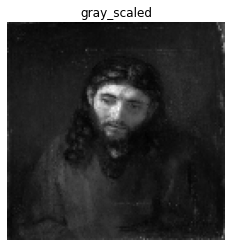

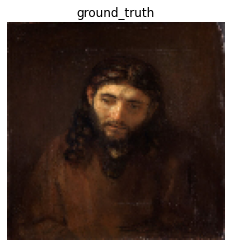

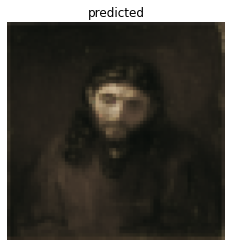

In [47]:
for i in data_train.take(1):
    plt.imshow(i[0][0], cmap='gray')
    plt.title('gray_scaled')
    plt.axis('off')
    plt.show()
    plt.title('ground_truth')
    plt.axis('off')
    plt.imshow(i[1][0])
    output = model(np.array(i[0][0]).reshape((1, 128, 128, 1)))
    plt.show()
    plt.title('predicted')
    plt.axis('off')
    plt.imshow(output[0])